# INFO 204 Lab 4 - Exploratory Data Analysis and Regression

In this lab, you will perform basic regression tasks on a set of provided data. The data are provided on Blackboard as a CSV file, and represent the CO<sub>2</sub> emissions for a range of different car makes and models, along with potentially relevant features.

Before doing any modelling, you will explore the data via descriptive statistics and visualisations (a process called _Exploratory Data Analysis_). The idea of this activity is to gain a better understanding of the problem features, and hopefilly make subsequent modelling more effective and easier.

Most of the code required for this lab has been presented in previous labs and lectures - please ensure that you have these Jupyter notebooks handy to ease your work.

## Part 1 - Exploratory Data Analysis

In this step, you will work with importing CSV files using pandas, and then explore the data through descriptive stats and plots.

The data desribes the CO<sub>2</sub> emissions (grams per 100km) for a range of makes and models of cars for sale in Canada. Along with the car's emissions, the following features are provided:

* Make and Model (text)
* Vehicle Class (categorical) - 16 categories that describe the nature of the car (e.g., two-seater, SUV, ...)
* Engine Size (L) (numeric)
* \# of cylinders in engine
* Transmssion (categorical) - 5 categories (A = automatic, AM = automated manual, AS = automatic with select shift, AV = continuously variable, M = manual)
* Fuel Type (categorical) - 5 categories (X = regular gasoline, Z = premium gasoline, D = diesel, E = ethanol (E85), N = natural gas)
* Fuel Consumption in (L/100km) for City, Highway and Combined, as well as US miles per gallon (MPG)

Your task later in this lab is to use combinations of these features to build models that predict the CO<sub>2</sub> emissions for a given vehicle.

As always, import the libraries that you will need for this lab (we'll import all the libraries now to avoid problems later on) - <span style="color: #ce2227;">remember that if you are working in Google Colab, you will also need to include the helper routines to upload the required files (see Lab 3 for more information)</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**<span style="color: #ce2227;">TASK 1:</span>** load the file CO2_Emissions_Canada.csv into a pandas Data Frame called <code>emissions</code>:

In [37]:
## WRITE YOUR CODE HERE
emissions = pd.read_csv('CO2_Emissions_Canada.csv')

**<span style="color: #ce2227;">TASK 2:</span>** use the [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function to extract some basic metadata from the loaded data:

In [27]:
## WRITE YOUR CODE HERE
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

**<span style="color: #ce2227;">TASK 3:</span>** Comment on the nature of the data - what are the data types? Are there missing values?

The datatypes are objects, integers and floating point numbers (decimal). There are no missing values.

**<span style="color: #ce2227;">TASK 4:</span>** use the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to gather some descriptive statistics of the numeric data types in the data frame:

In [28]:
## WRITE YOUR CODE HERE
emissions.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**<span style="color: #ce2227;">TASK 5:</span>** Comment on the scale of the numeric data - do you think that there will be an issue with variable scale for this data set? Will we need to standardise variables for methods that are sensitive to variations in scale?

The scale of the data varies greatly between rrows especially CO2 emissions as the measure of the variables differes from 100/km to g/km which means they are measuring different values. Standardisation will need to be used in order to properply model and display the data and to use them in methods that are sensitive to scale such as plots.

**<span style="color: #ce2227;">TASK 6:</span>** Create a [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) of the numeric data in the data set to visualise any potentially useful relationships in the data:

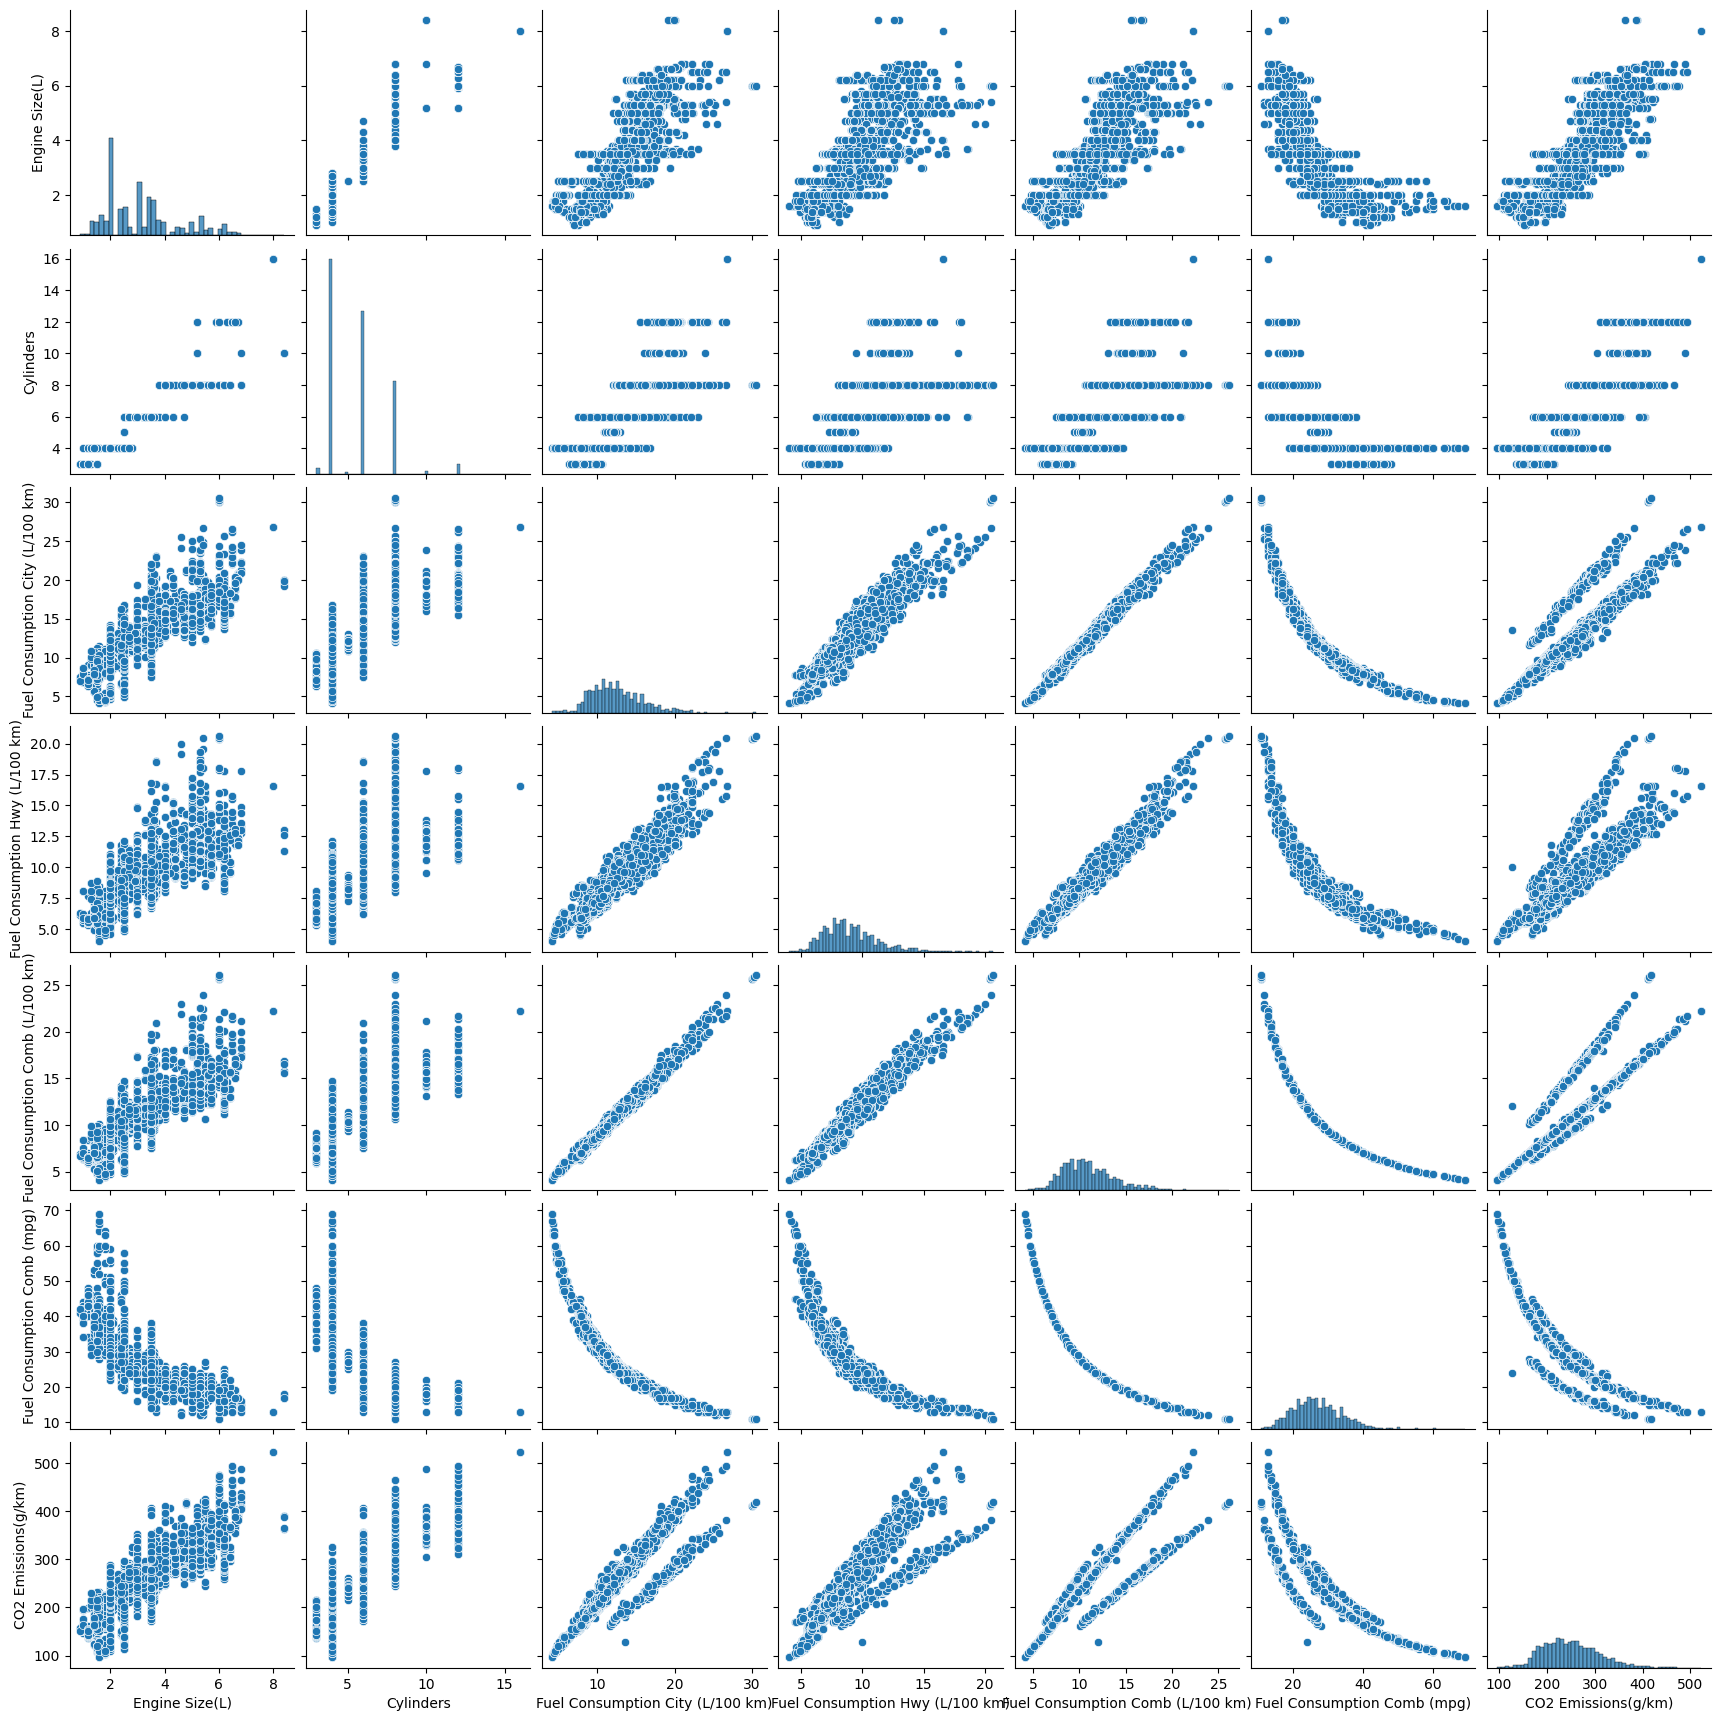

In [29]:
## WRITE YOUR CODE HERE
sns.pairplot(emissions)

**<span style="color: #ce2227;">TASK 7:</span>** Briefly comment on any potentially interesting relationships:

Some interesting observations are:
    * As engine size increases, so to does CO2 emissions but the Fuel Consumption actually decreases
    * That being said C02 Emissions get higher as fuel consumption increases
    * Having in between 5-10 cylinders (around 8) results in higher fuel consumption per 100km than a car with 15 or greater, however CO2 emissions go up with the amount of cylinders
    * Fuel Consumption Comb when measuring mpg goes down as Co2 emissions go up.

**<span style="color: #ce2227;">TASK 8:</span>** There appears to be an interesting characteristic in the relatioship between fuel consumption and emissions - there is some clear grouping going on. Repeat the pairplot below, but add a hue argument to add grouping and colour by 'Fuel Type':

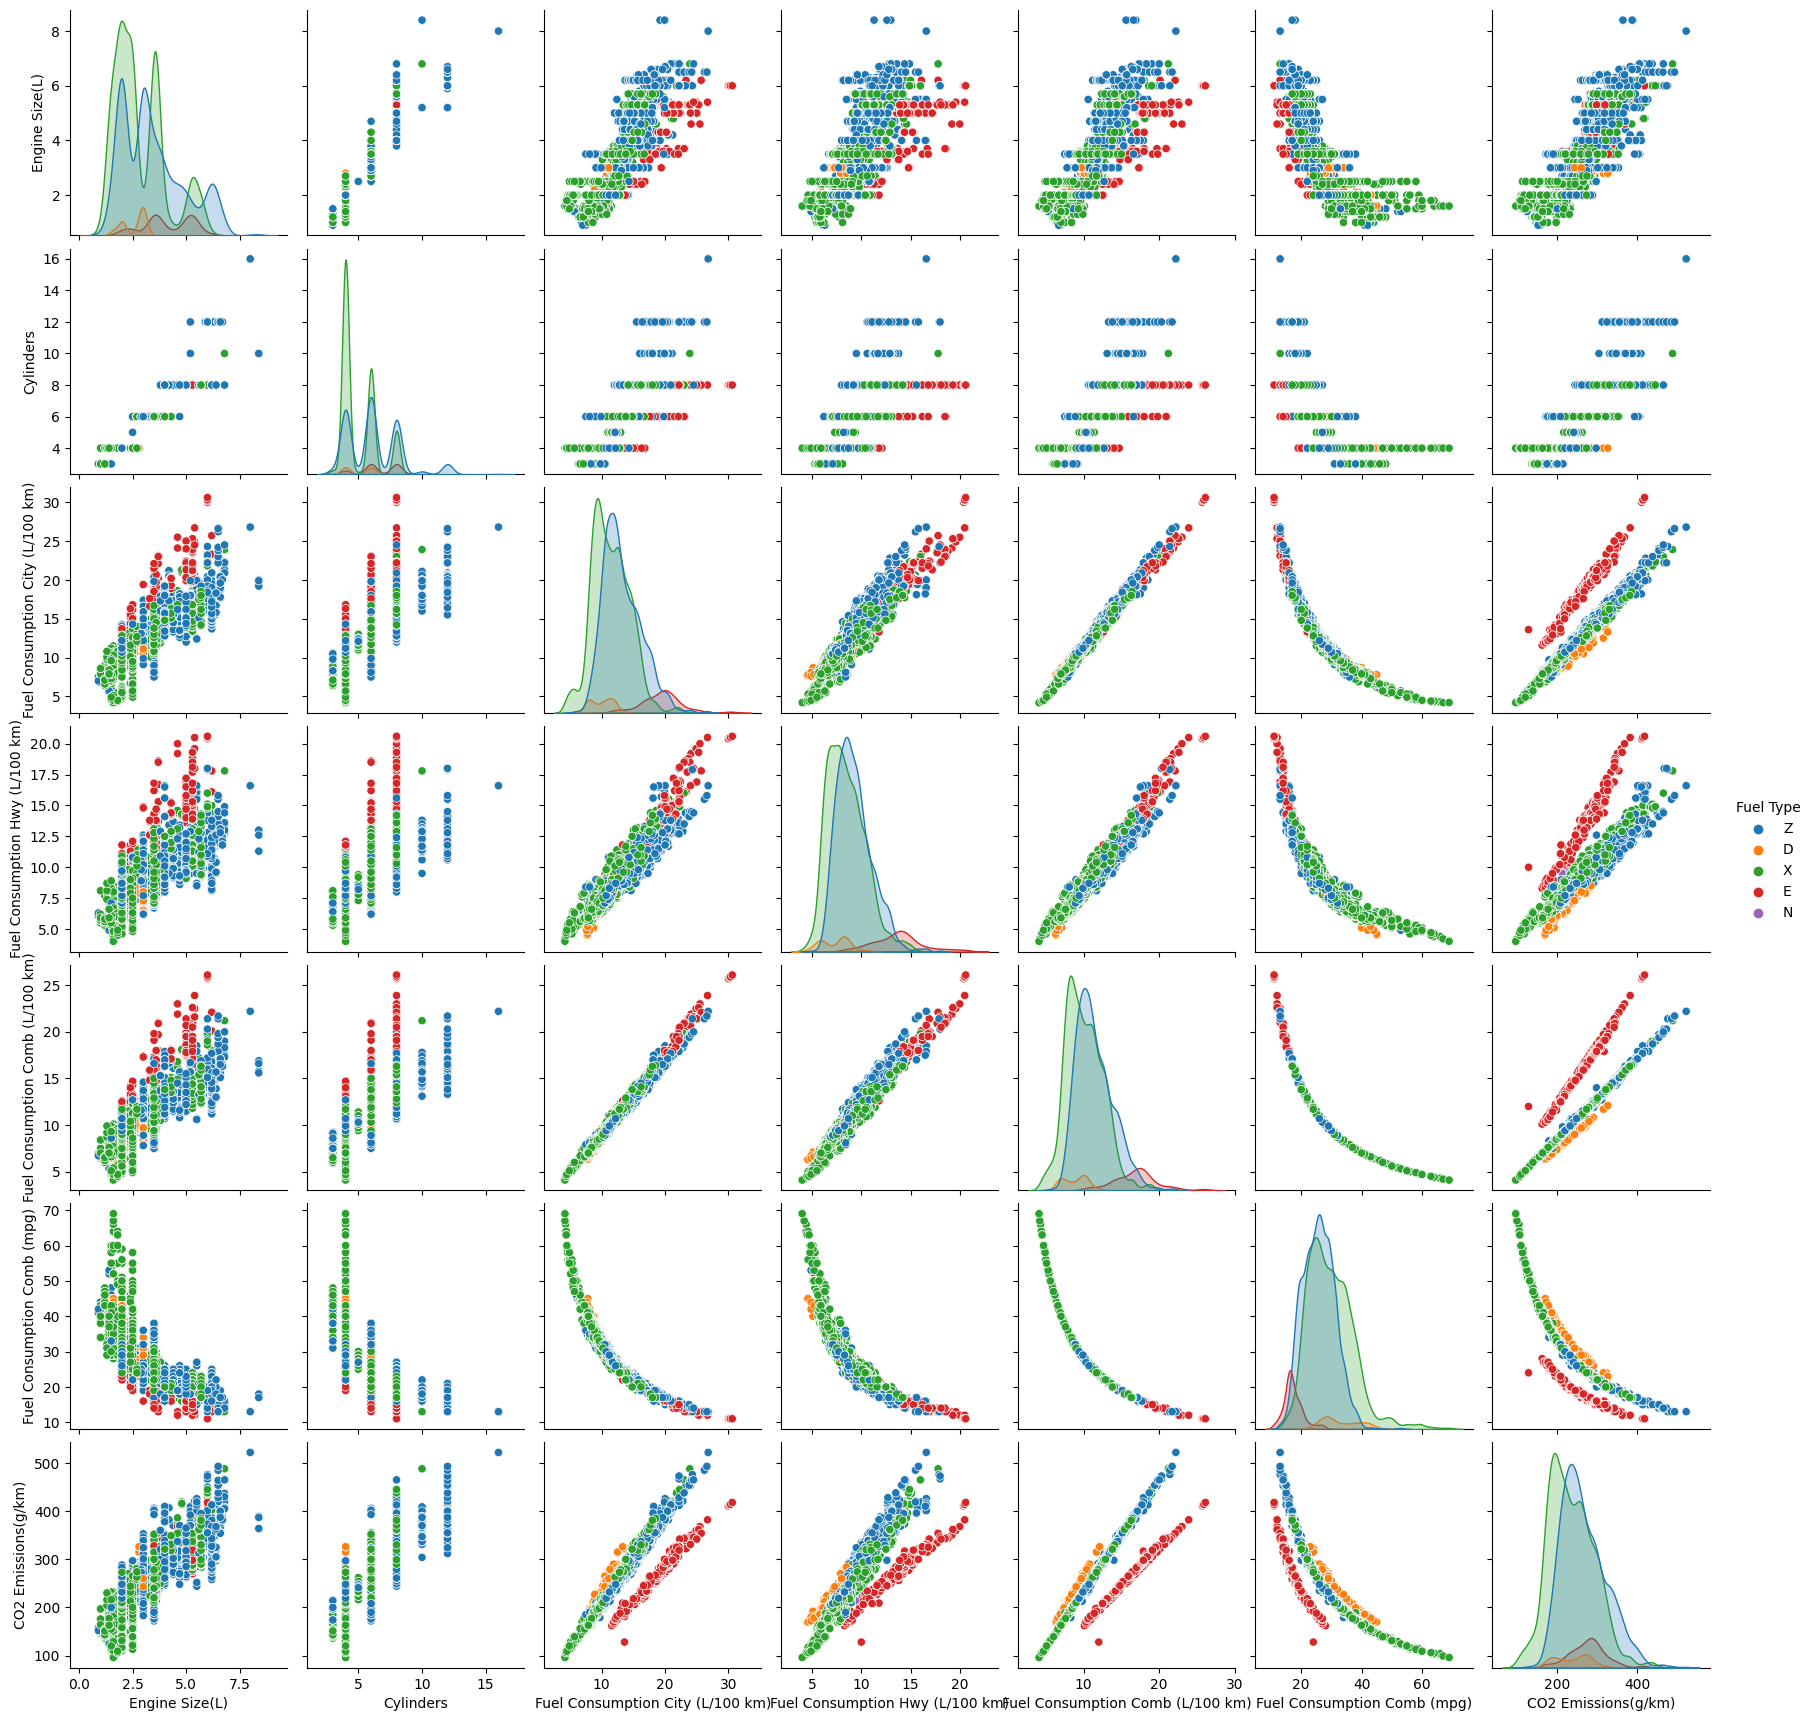

In [10]:
## WRITE YOUR CODE HERE
sns.pairplot(emissions, hue='Fuel Type')

**<span style="color: #ce2227;">TASK 9:</span>** Briefly comment on what you observe in the pairplot. Prior to commencing your modelling, do you have any hunches on what kind of model might be well-suited to this problem?

   Observations
    * Type E fuel on average has less CO2 emissions than the other types of fuel when consumption is the same
    * A Linear model might be well suited to this problem as it can clearly show the correlation in relationship between two variables.

## Part 2 - Preparing the Data

In this step, we will be using pandas and numpy to manipulate our data set and clean things up prior to modelling. In this step, you would normally:
* Remove extraneous features that might get in the way of modelling
* Edit the values of features as necessary
* Dummy encode features as necessary
* Remove rows with missing values (of impute the missing values), if required.
* etc.

For our data, the following processing is recommended:
1. Remove the Make, Model, Cylinders, Fuel Consumption Comb (mpg), Fuel Consumption Comb (L/100 km) features (why?)
2. Edit the Transmission feature so that the number of gears a car has is removed (emissions\['Transmission'\].str.replace('[0-9]', '', regex=True) will help here.
3. One-hot encode the Vehicle Class, Transmission, and Fuel Type features

**<span style="color: #ce2227;">TASK 10:</span>** process the required edits to the <code>emissions</code> data frame:

In [38]:
## WRITE YOUR CODE HERE
emissions = emissions.drop(['Make', 'Model', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'Fuel Consumption Comb (L/100 km)'], axis =1)
emissions['Transmission'] = emissions['Transmission'].str.replace('[0-9]', '', regex=True)
emissions = pd.get_dummies(emissions)
emissions

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,9.9,6.7,196,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2.4,11.2,7.7,221,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,6.0,5.8,136,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.5,12.7,9.1,255,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.5,12.1,8.7,244,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,10.7,7.7,219,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7381,2.0,11.2,8.3,232,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7382,2.0,11.7,8.6,240,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7383,2.0,11.2,8.3,232,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


At this stage, you shold now have a data frame with 7385 rows and 30 columns.

## Part 3 - Regression

We're new ready to build some basic models on our data.

As discussed in Lecture 8, it is important that we assess the models that we build by using observations that were not available during model fitting. This is to ensure that our error estimate provides some notion of _generalisation_ performance, and not merely an indicator of how well our model has memorised the training observations.

Let's start by extracting the <code>X</code> (features) and <code>t</code> (target) elements from our <code>emissions</code> data frame:

In [83]:
target = 'CO2 Emissions(g/km)'
X = emissions.drop(columns=[target]).to_numpy()
t = emissions[target].to_numpy()

And from here let's break them down into _training_ and _testing_ sets:

In [84]:
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7, random_state=1234) ## note the fixed random_state for reproducibility, in reality you'd remove this!

For our first model, let's perform linear regression (check with the notebooks that accompany Lecture 6 for details on how to fit and apply a linear model to data):

**<span style="color: #ce2227;">TASK 11:</span>** Construct a <code>LinearRegression</code> model and fit it to <code>X_train</code> and <code>t_train</code>. Then, use the model to predict values for our test set <code>X_test</code>, and measure the performance of the model using both MSE and $R^2$

In [87]:
## WRITE YOUR CODE HERE
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression().fit(X_train, t_train)
y_test= lr_model.predict(X_test)
print(f"predicted response:\n{y_test}")
r_sq = lr_model.score(X_train, t_train)
print(f"coefficient of determination: {r_sq}")
mse=mean_squared_error(t_test, y_test)
print(f"mean squared error: {mse}")



predicted response:
[226.05762763 184.72261045 463.79245168 ... 295.28547958 234.78957689
 164.75815658]
coefficient of determination: 0.9926063184148565
mean squared error: 30.791290370924216


Unfortunately, scikit-learn is not really set up for diagnostics of linear models (we'll briefly discuss this at the end of the lab), so we'll just rely on the performance scores of the model for now.

Now, build a k-Nearest Neighours model on the data, using a neighbourhood size (<code>n_neighbors</code> argument) of 2.

**<span style="color: #ce2227;">TASK 12:</span>** Construct a <code>KNeighborsRegressor</code> model and fit it to <code>X_train</code> and <code>t_train</code>. Then, use the model to predict values for our test set <code>X_test</code>, and measure the performance of the model using both MSE and $R^2$

In [89]:
## WRITE YOUR CODE HERE
kn_model = KNeighborsRegressor(n_neighbors = 2).fit( X_train, t_train)
y_test= kn_model.predict(X_test)
print(f"predicted response:\n{y_test}")
r_sq = kn_model.score(X_train, t_train)
print(f"coefficient of determination: {r_sq}")
mse=mean_squared_error(t_test, y_test)
print(f"mean squared error: {mse}")


predicted response:
[224.  182.  413.5 ... 296.  232.5 163. ]
coefficient of determination: 0.9985275141443805
mean squared error: 52.151624548736464


If you have created the models correctly, you should note that the performance of kNN is not as good as for the linear model (how do you know this?) - why do you think this might be?

**<span style="color: #ce2227;">TASK 13:</span>** Comment on the kNN performance:

The reason the kNN is not as good as the linear model is because of the higher MSE. while the coefficient of determination is pretty good meaning that the model can explain well the variation of outputs given the inputs. However there is a very high MSE compared to the linear model which means that its not the greatest. K nearest neighbours struggles with datasets that are multiple dimensions as predictions need to be close in dimensions as well for it to be accurate but this is harder to do when datasets have more dimensions.

As discussed in classes, kNN can be very sensitive to differences in scale between features (you should remind yourself why this is before proceeding). According to our previous exploratory data analysis, it appears that our features differ somewhat in terms of their standard deviations, which is an indicator that we may have an issue of scale between our features. Therefore, we should repeat our kNN analysis, but this time using standardised features.

Fortunately, scikit-learn provides the functionality to standardise features out of the box. To perform standardisation, we use the <code>StandardScaler</code>:

In [90]:
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train) ## we call fit_transform() to first work out the scaling parameters (mu and sigma), and THEN perform the scaling!

Because we have scaled our training data, we need to perform the same transformation to our test data:

In [91]:
Z_test = scaler.transform(X_test) ## notice that we call transform() this time - we have already worked out the scaling parameters from the training data!

And now you can perform the Z-Score standardised kNN regression.

**<span style="color: #ce2227;">TASK 14:</span>** Construct a <code>KNeighborsRegressor</code> model and fit it to <code>Z_train</code> and <code>t_train</code>. Then, use the model to predict values for our test set <code>Z_test</code>, and measure the performance of the model using both MSE and $R^2$

In [92]:
## WRITE YOUR CODE HERE
kn_model = KNeighborsRegressor(n_neighbors = 2).fit( Z_train, t_train)
y_test= kn_model.predict(Z_test)
print(f"predicted response:\n{Z_test}")
r_sq = kn_model.score(Z_train, t_train)
print(f"coefficient of determination: {r_sq}")
mse=mean_squared_error(t_test, y_test)
print(f"mean squared error: {mse}")

predicted response:
[[-0.10497831 -0.4634476  -0.37118917 ... -0.01391037 -1.00251816
   1.15346344]
 [-1.00300542 -1.12155292 -0.86587896 ... -0.01391037  0.99748816
  -0.86695422]
 [ 2.14008947  5.08752779  5.16034208 ... -0.01391037 -1.00251816
  -0.86695422]
 ...
 [ 0.26919965  0.39495066  0.97796479 ... -0.01391037  0.99748816
  -0.86695422]
 [-0.85333424 -0.32038122 -0.28124557 ... -0.01391037  0.99748816
  -0.86695422]
 [-1.00300542 -1.29323258 -1.40554054 ... -0.01391037  0.99748816
  -0.86695422]]
coefficient of determination: 0.997422623389138
mean squared error: 51.088447653429604


In this particular case, it looks as though standardisation hasn't helped much, if at all. However, it's always worth looking into this when using kNN.

Finally, let's explore modelling our data with decision trees.

As discussed in lectures, the most crucial hyperparameter for CART (the algorithm that builds the decision tree) is called _minsplit_. This is implemented in scikit-learn through the <code>min_samples_split</code> property of the <code>DecisionTreeRegressor</code>. Rather than build a single tree for a single value of _minsplit_, let's build a range of different trees using different values for _minsplit_ and see what impact this parameter has on tree building behaviour.

**<span style="color: #ce2227;">TASK 15:</span>** Start with an empty list called <code>mse_CART</code>. Using an appropriate loop, create and fit a <code>DecisionTreeRegressor</code> on <code>X_train</code> and <code>t_train</code> for <code>min_samples_split</code> in the list: <code>[ 2, 3, 5, 8, 13, 21, 34, 55, 89, 144 ]</code>. For each value of <code>min_samples_split</code>, obtain the model predictions on <code>X_test</code>, compute the MSE, and then append to the list <code>mse_CART</code> a list containing <code>min_samples_split</code> and the MSE.

In [113]:
## WRITE YOUR CODE HERE
mse_CART = []
for i in [ 2, 3, 5, 8, 13, 21, 34, 55, 89, 144 ]:
    mdl = DecisionTreeRegressor(min_samples_split=i)
    mdl.fit(X_train, t_train)
    mse = mean_squared_error(t_test, mdl.predict(X_test))
    mse_CART.append([i, mse])
print(mse_CART)

[[2, 36.472423578313155], [3, 28.220866465847234], [5, 26.88718315512824], [8, 27.80263778011903], [13, 29.26317059182159], [21, 40.05713324314599], [34, 36.95976662298844], [55, 59.71700886437178], [89, 58.84622729928121], [144, 86.25846315208854]]


If you have completed the previous task correctly, then the next code cell should produce a plot of the performance of CART on our data set for a given value of _minsplit_:

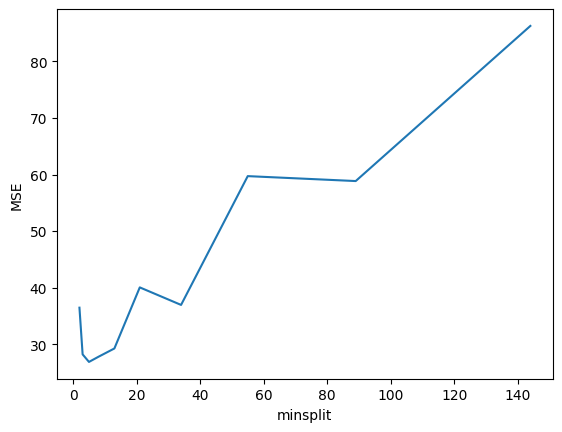

In [114]:
mse_CART = np.array(mse_CART)
plot_data = pd.DataFrame({
    'minsplit' : mse_CART[:, 0],
    'MSE' : mse_CART[:, 1]
})

sns.lineplot(data=plot_data, x='minsplit', y='MSE');

We can see that, for this data and this train/test split, smaller splits appear to work best. Again, this will not always be the case, so you should find a systematic way to let the data suggest what _minsplit_ should be set to. (we'll look into this in a later lab!)

As a final step, we should build and visualise a "reasonable" sized tree. We'll use the [<code>plot_tree()</code>](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function for this:

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,9.9,6.7,196,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2.4,11.2,7.7,221,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,6.0,5.8,136,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.5,12.7,9.1,255,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.5,12.1,8.7,244,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,10.7,7.7,219,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7381,2.0,11.2,8.3,232,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7382,2.0,11.7,8.6,240,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7383,2.0,11.2,8.3,232,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


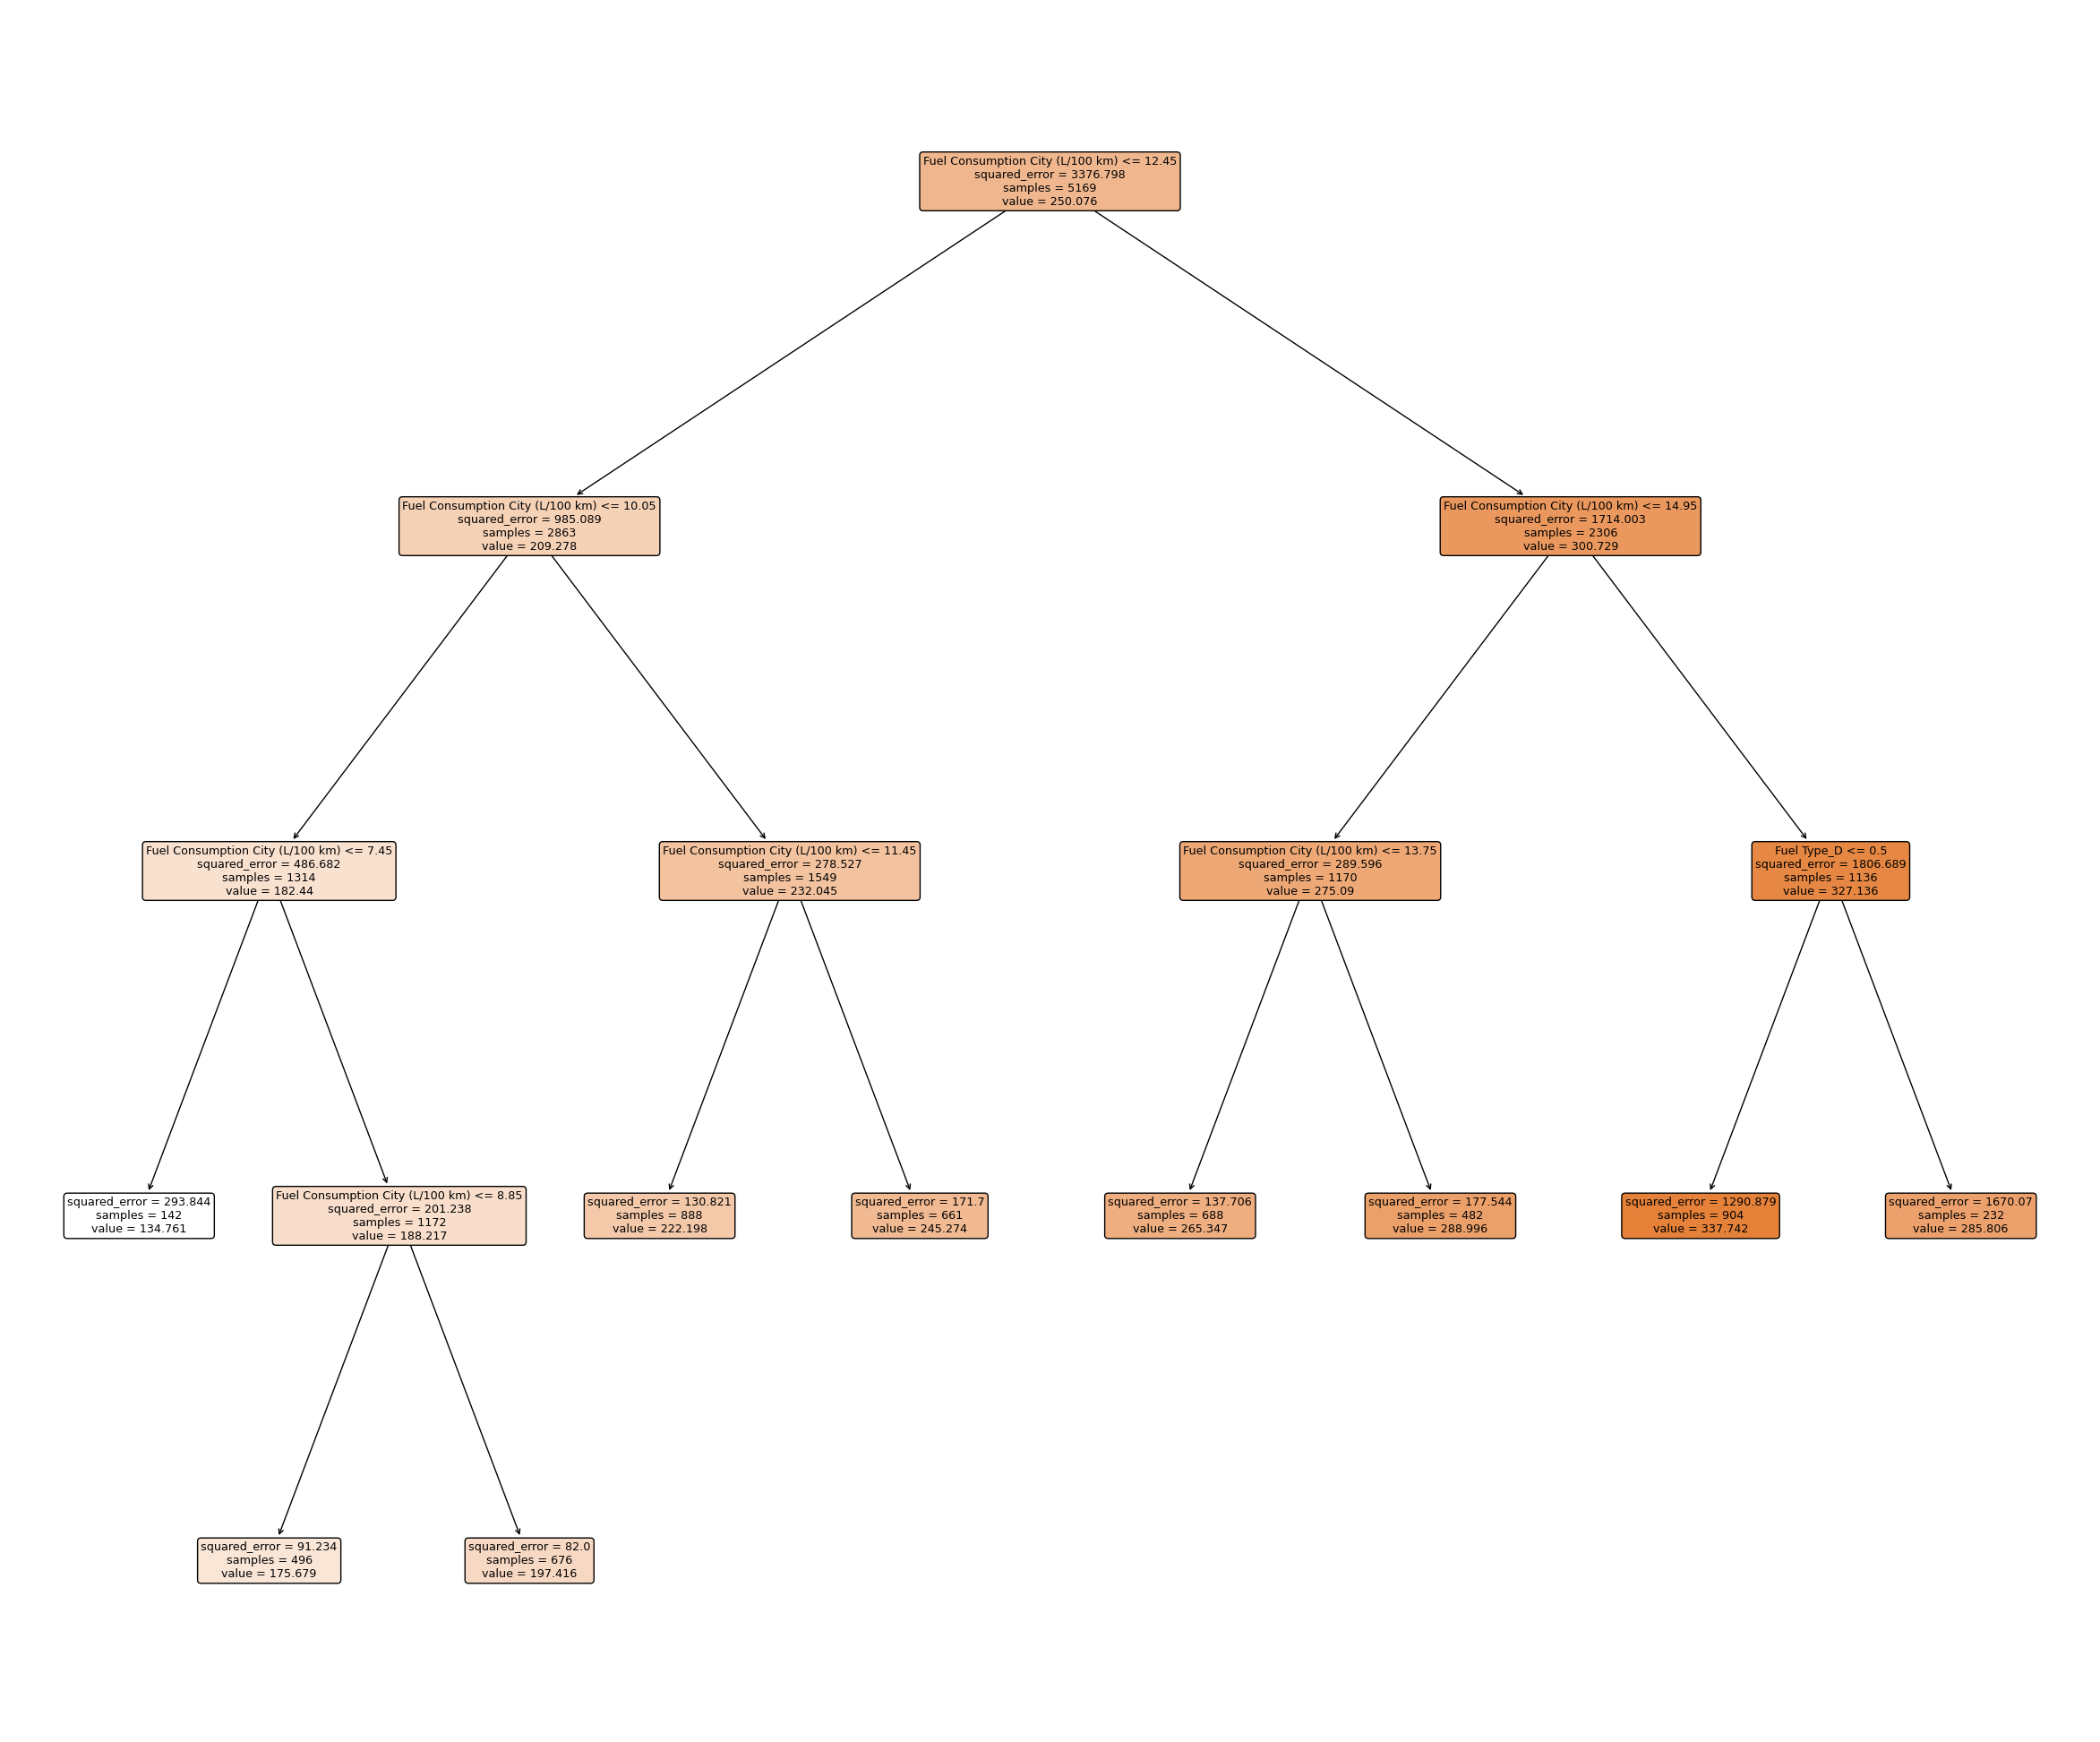

In [116]:
tree = DecisionTreeRegressor(random_state=0, min_samples_split=1000)
tree.fit(X_train, t_train)
plt.figure(figsize=(30,25))
plot_tree(tree, rounded=True, filled=True, feature_names=emissions.columns.values);
emissions

**<span style="color: #ce2227;">TASK 16:</span>** Inspect the tree, and provide a brief summary below of what you notice (e.g., are there any dominant features? are all the features present in the tree?)

In the tree only the numeric features a represented. In general there is a lot more samples for fuel consumption being on the lower side than higher than the initial node. Fuel Type is only asked for on the right side of the tree and it only specified fuel type D when there are multiple other fuel types

## The End

You've reached the end of the lab. Be sure to save and upload your work to Blackboard before the due date.

## Postscript - Model Diagnostics (not assessed!)

For those of you familar with R, you will know that it provides a lot of functionality out of the box for model diagnostics (checking goodness of fit beyond comparing error measures). This has some roots in that scikit-learn leans slightly more to "machine learning", while R is more oriented towards statistical inference. So, you won't find a [<code>summary()</code>](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/summary) function in scikit-learn's implementation of linear modelling. However, another Python package, statsmodels, has this functionality (and more, for example it has built-in correlation plots). We won't explore statsmodels very much in this paper, but you are encouraged to explore it on your own.
    
Below is a quick example of some of the functionality of the statsmodels package.

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr

emissions = pd.read_csv('CO2_Emissions_Canada.csv')

corr = emissions.corr()
fig = plot_corr(corr, xnames=corr.columns.values)
fig.set_figwidth(20)
fig.set_figheight(16)
plt.show();

ols = sm.ols('Q("CO2 Emissions(g/km)") ~ Q("Fuel Consumption City (L/100 km)") + Q("Fuel Consumption Hwy (L/100 km)") + Q("Fuel Type")', emissions)
fitted = ols.fit()
print(fitted.summary())

And so now we have some diagnostics of our model fit. <span style="color: #ce2227;">Pay attention to the notes! In this case, there's potentially some concern for the fit</span> (essentially, from the model perspective, it could almost be too good to be true!)